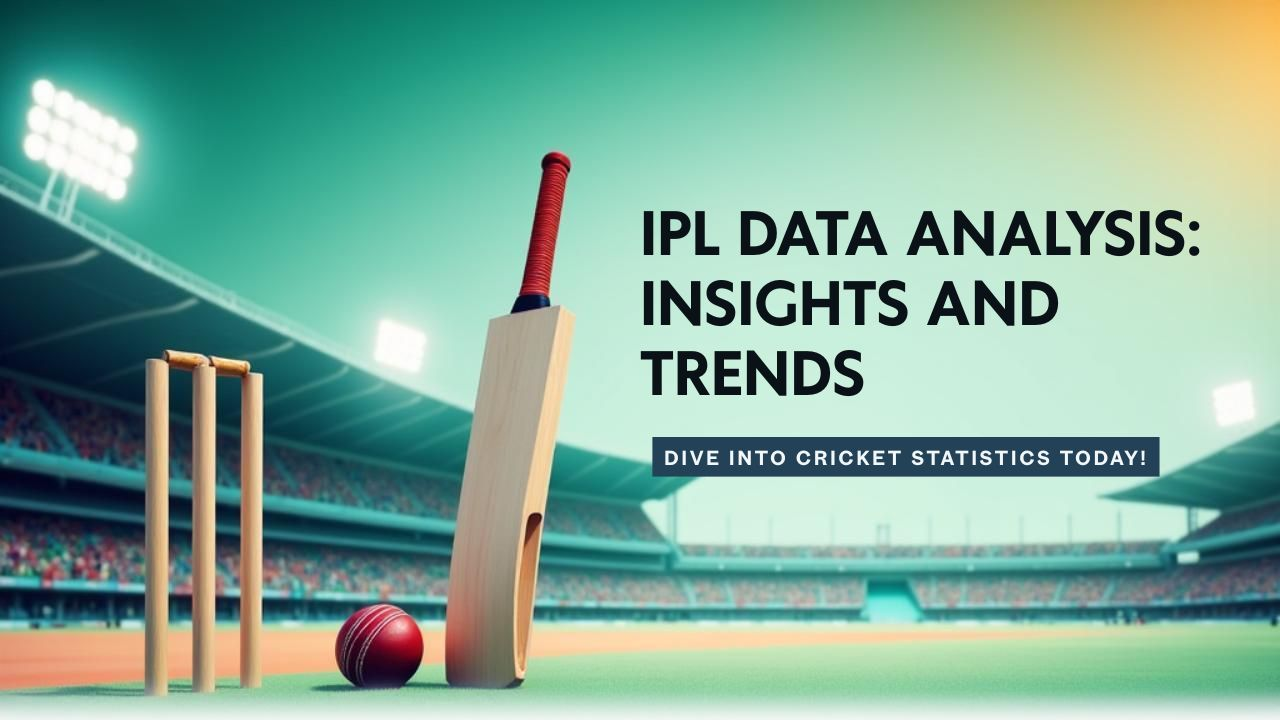

#**Problem statement**

Conduct a comprehensive exploratory data analysis (EDA) on the provided Indian Premier League (IPL) dataset to uncover insights and trends across various aspects of the tournament from 2008 to 2020.

#**Objective**

The objective of this project is to perform an in-depth analysis of the IPL dataset, covering key areas such as:

* Analyzing the number of matches played and runs scored per season.
* Investigating the impact of toss decisions on match outcomes.
* Evaluating team performance, including wins and winning percentages.
* Identifying key player statistics, such as leading run-scorers, wicket-takers, and players with the most boundaries and high strike rates.
* Exploring venue statistics to identify patterns and potential "lucky" grounds for teams.
* Comparing team performance across different phases of the game (powerplay, death overs).

**Through this analysis, the aim is to gain a deeper understanding of the dynamics of the IPL, identify significant trends, and present the findings through visualizations and clear interpretations.**

**Dataset information:**

The Indian Premier League (IPL) a professional Twenty20 cricket league in India usually contested between March and May of every year by eight teams representing eight different cities or states in India. The league was founded by the Board of Control for Cricket in India (BCCI) in 2007. The IPL is the most-attended cricket league in the world and the brand value of the IPL in 2019 was 475 billion (US$6.7 billion)



The dataset consists of two files:
1. Deliveries Dataset:
https://drive.google.com/file/d/1O6E5DBDSFYSK4D9kandO-ELgFV23GVyi/view?usp=sharing
2. Match Dataset:
https://drive.google.com/file/d/1tfdKTH39s8bhpRbY_Sz5FYO6IRPoFoeG/view?usp=sharing





#**Data Dictionary**

Here is a description of the columns in each dataframe:

**matches_df (IPL Matches 2008-2020):**

* id: Unique identifier for each match.
* city: City where the match was played.
* date: Date the match was played.
* player_of_match: Player who received the Man of the Match award.
* venue: Stadium where the match was played.
* neutral_venue: Indicates if the venue was neutral (1) or not (0).
* team1: First team playing in the match.
* team2: Second team playing in the match.
* toss_winner: Team that won the toss.
* toss_decision: Decision made by the toss winner (bat or field).
* winner: Team that won the match.
* result: Result of the match (e.g., runs, wickets, tie).
* result_margin: Margin of victory (runs or wickets).
* eliminator: Indicates if the match was an eliminator (Y) or not (N).
* method: D/L method if applied (e.g., D/L).
* umpire1: First umpire of the match.
* umpire2: Second umpire of the match.
* season: Year the match was played (derived from the date).
* toss_win_match_win: Binary indicator if the team winning the toss also won the match (1) or not (0).

**balls_df (IPL Ball-by-Ball 2008-2020):**

* id: Unique identifier for the match (links to matches_df).
* inning: Inning number (1 or 2).
* over: Over number within the inning.
* ball: Ball number within the over.
* batsman: Batsman facing the ball.
* non_striker: Non-striker batsman.
* bowler: Bowler bowling the ball.
* batsman_runs: Runs scored by the batsman on that ball.
* extra_runs: Extra runs conceded on that ball (e.g., wide, no-ball).
* total_runs: Total runs scored on that ball (batsman_runs + extra_runs).
* non_boundary: Indicates if the ball did not cross the boundary (1) or not (0).
* is_wicket: Indicates if a wicket was taken on that ball (1) or not (0).
* dismissal_kind: Type of dismissal (e.g., caught, bowled, run out).
* player_dismissed: Player who was dismissed.
* fielder: Fielder involved in the dismissal (if any).
* extras_type: Type of extra conceded (e.g., wide, no-ball).
* batting_team: Team batting in that inning.
* bowling_team: Team bowling in that inning.

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting the parameter for the plot
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (5,3)

In [3]:
#Loading the datasets
matches_df=pd.read_csv('/content/IPL Matches 2008-2020.csv')
balls_df=pd.read_csv('/content/IPL Ball-by-Ball 2008-2020.csv')

In [4]:
#optional processing
matches_df['date']= pd.to_datetime(matches_df['date'])
matches_df['season'] = matches_df['date'].dt.year

In [5]:
matches_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [6]:
balls_df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [7]:
print(matches_df.shape)
print(balls_df.shape)

(816, 18)
(193468, 18)


In [8]:
print(matches_df.info())
print(balls_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               816 non-null    int64         
 1   city             803 non-null    object        
 2   date             816 non-null    datetime64[ns]
 3   player_of_match  812 non-null    object        
 4   venue            816 non-null    object        
 5   neutral_venue    816 non-null    int64         
 6   team1            816 non-null    object        
 7   team2            816 non-null    object        
 8   toss_winner      816 non-null    object        
 9   toss_decision    816 non-null    object        
 10  winner           812 non-null    object        
 11  result           812 non-null    object        
 12  result_margin    799 non-null    float64       
 13  eliminator       812 non-null    object        
 14  method           19 non-null     object   

#Summary Statistics

In [9]:
matches_df.describe()

,id,date,neutral_venue,result_margin,season
count,8.160000e+02,816,816.000000,799.000000,816.000000
mean,7.563496e+05,2014-04-13 19:07:03.529411840,0.094363,17.321652,2013.926471
min,3.359820e+05,2008-04-18 00:00:00,0.000000,1.000000,2008.000000
25%,5.012278e+05,2011-04-26 18:00:00,0.000000,6.000000,2011.000000
50%,7.292980e+05,2014-04-23 12:00:00,0.000000,8.000000,2014.000000
75%,1.082626e+06,2017-04-30 00:00:00,0.000000,19.500000,2017.000000
max,1.237181e+06,2020-11-10 00:00:00,1.000000,146.000000,2020.000000
std,3.058943e+05,NaN,0.292512,22.068427,3.665054


In [10]:
balls_df.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


#Checking for Null values

In [11]:
matches_df.isnull().sum()

,0
id,0
city,13
date,0
player_of_match,4
venue,0
neutral_venue,0
team1,0
team2,0
toss_winner,0
toss_decision,0


In [12]:
balls_df.isnull().sum()

,0
id,0
inning,0
over,0
ball,0
batsman,0
non_striker,0
bowler,0
batsman_runs,0
extra_runs,0
total_runs,0


#Checking for duplicate values

In [13]:
matches_df.duplicated().sum()

np.int64(0)

In [14]:
balls_df.duplicated().sum()

np.int64(1)

#Missing values Imputation

In [15]:
#for city column
matches_df[matches_df['city'].isnull()]['venue'].unique()

array(['Sharjah Cricket Stadium', 'Dubai International Cricket Stadium'],
      dtype=object)

In [16]:
matches_df[matches_df['venue']=='Sharjah Cricket Stadium']['city'].unique()

array([nan, 'Sharjah'], dtype=object)

In [17]:
matches_df[matches_df['venue']=='Dubai International Cricket Stadium']['city'].unique()

array([nan, 'Dubai'], dtype=object)

In [18]:
matches_df['city']=np.where(matches_df['venue']=='Sharjah Cricket Stadium','Sharjah',matches_df['city'])

In [19]:
matches_df['city']= np.where(matches_df['venue']=='Dubai International Cricket Stadium','Dubai', matches_df['city'])

In [20]:
matches_df['city'].isnull().sum()

np.int64(0)

In [21]:
# for player_of_match column

matches_df['player_of_match']=matches_df['player_of_match'].fillna('no_player_of _the_match')

In [22]:
matches_df.isnull().sum()

,0
id,0
city,0
date,0
player_of_match,0
venue,0
neutral_venue,0
team1,0
team2,0
toss_winner,0
toss_decision,0


In [23]:
#for winner column

matches_df['winner']=matches_df['winner'].fillna("no winner")

In [24]:
matches_df['result']=matches_df['result'].fillna('no result')

In [25]:
matches_df['result_margin']=matches_df['result_margin'].fillna('0.0')

In [26]:
matches_df['eliminator']=matches_df['eliminator'].fillna('no eliminator')

In [27]:
matches_df['method']=matches_df['method'].fillna('no method')

In [28]:
matches_df.isnull().sum()

,0
id,0
city,0
date,0
player_of_match,0
venue,0
neutral_venue,0
team1,0
team2,0
toss_winner,0
toss_decision,0


**Observations:** There are no null values in matches_df.

In [29]:
# Handling missing values in balls data set
balls_df.isnull().sum()

,0
id,0
inning,0
over,0
ball,0
batsman,0
non_striker,0
bowler,0
batsman_runs,0
extra_runs,0
total_runs,0


**Checking the percentage of missing values**

In [30]:
def missing(balls_df):
    print (round((balls_df.isnull().sum() * 100/ len(balls_df)),2).sort_values(ascending=False))

missing(balls_df)

fielder             96.49
player_dismissed    95.09
dismissal_kind      95.09
extras_type         94.71
bowling_team         0.10
id                   0.00
inning               0.00
over                 0.00
batsman              0.00
ball                 0.00
total_runs           0.00
extra_runs           0.00
batsman_runs         0.00
bowler               0.00
non_striker          0.00
is_wicket            0.00
non_boundary         0.00
batting_team         0.00
dtype: float64


In [31]:
balls_df['fielder']=balls_df['fielder'].fillna('no fielder')

In [32]:
balls_df['player_dismissed']=balls_df['player_dismissed'].fillna('no player dismissed')

In [33]:
balls_df['dismissal_kind'].fillna('no dismissal kind',inplace=True)

In [34]:
balls_df['extras_type'].fillna('no extras type',inplace=True)

In [35]:
balls_df['bowling_team'].fillna('no bowling team',inplace=True)

In [36]:
balls_df.isnull().sum()

,0
id,0
inning,0
over,0
ball,0
batsman,0
non_striker,0
bowler,0
batsman_runs,0
extra_runs,0
total_runs,0


In [37]:
#Cleaning Data

In [38]:
balls_df.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [39]:
balls_df.bowling_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Chennai Super Kings', 'Kings XI Punjab', 'Delhi Daredevils',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'no bowling team',
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [40]:
balls_df['batting_team']=np.where(balls_df['batting_team']=='Delhi Daredevils','Delhi Capitals',balls_df['batting_team'])

In [41]:
balls_df['bowling_team']=np.where(balls_df['bowling_team']=='Delhi Daredevils','Delhi Capitals',balls_df['bowling_team'])

In [42]:
balls_df['batting_team']=np.where(balls_df['batting_team']=='Rising Pune Supergiants','Rising Pune Supergiant',balls_df['batting_team'])

In [43]:
balls_df['bowling_team']=np.where(balls_df['bowling_team']=='Rising Pune Supergiants','Rising Pune Supergiant',balls_df['bowling_team'])

In [44]:
matches_df['winner']=np.where(matches_df['winner']=='Delhi Daredevils','Delhi Capitals',matches_df['winner'])

In [45]:
matches_df['winner']=np.where(matches_df['winner']=='Rising Pune Supergiants','Rising Pune Supergiant',matches_df['winner'])

In [46]:
matches_df['toss_winner']=np.where(matches_df['toss_winner']=='Delhi Daredevils','Delhi Capitals',matches_df['toss_winner'])

In [47]:
matches_df['toss_winner']=np.where(matches_df['toss_winner']=='Rising Pune Supergiants','Rising Pune Supergiant',matches_df['toss_winner'])

In [48]:
matches_df['team1']=np.where(matches_df['team1']=='Delhi Daredevils','Delhi Capitals',matches_df['team1'])

In [49]:
matches_df['team2']=np.where(matches_df['team2']=='Delhi Daredevils','Delhi Capitals',matches_df['team2'])

In [50]:
matches_df['team1']=np.where(matches_df['team1']=='Rising Pune Supergiants','Rising Pune Supergiant',matches_df['team1'])

In [51]:
matches_df['team2']=np.where(matches_df['team2']=='Rising Pune Supergiants','Rising Pune Supergiant',matches_df['team2'])

In [52]:
matches_df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [53]:
matches_df['venue']= matches_df['venue'].replace('M Chinnaswamy Stadium','M.Chinnaswamy Stadium')

In [54]:
matches_df['venue']= matches_df['venue'].replace('Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association Stadium, Mohali')

In [55]:
matches_df['venue'].unique()

array(['M.Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

#**Exploratory Data Analysis**

In [56]:
#Question 1 -> what was the count of matches played in each season?
matches_per_season = matches_df['season'].value_counts().sort_index()
print(matches_per_season.head(15))

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
Name: count, dtype: int64


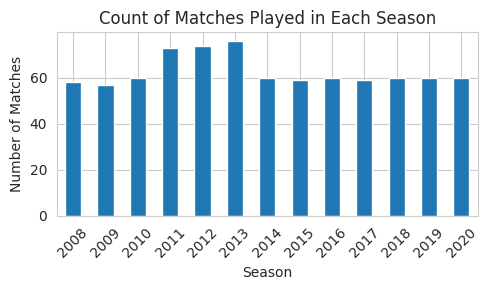

In [57]:
#Visualization 1:
plt.figure(figsize=(5, 3))
matches_per_season.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.title('Count of Matches Played in Each Season')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [58]:
#Question 2 -> How many runs were scored in each season?

#Merge matches and balls dataset
merged_df = pd.merge(matches_df, balls_df, on='id')

#Calculate total runs scored in each season
total_runs_per_season = merged_df.groupby('season')['total_runs'].sum()
total_runs_per_season.head(15)

,total_runs
season,
2008,17937
2009,16320
2010,18864
2011,21154
2012,22453
2013,22541
2014,18909
2015,18332
2016,18862


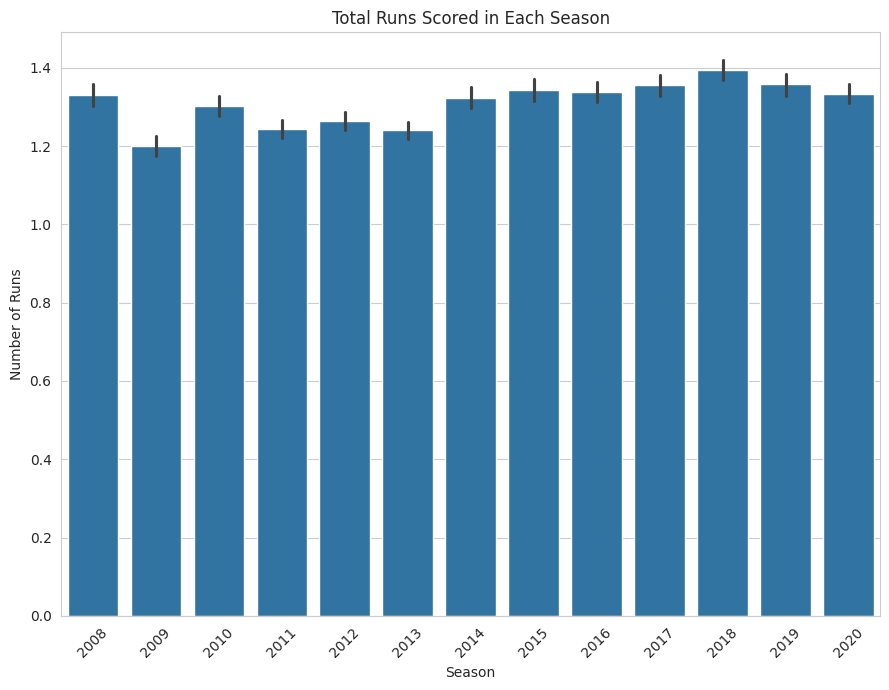

In [59]:
# Visualization 2 ->
plt.figure(figsize=(9, 7))
sns.barplot(x='season', y='total_runs', data=merged_df)
plt.xlabel('Season')
plt.ylabel('Number of Runs')
plt.title('Total Runs Scored in Each Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
# Question 3 -> What were the runs scored per match in different seasons?

merged_df.groupby(['season','id'])['total_runs'].sum()


season  id     
2008    335982     304
        335983     447
        335984     261
        335985     331
        335986     222
                  ... 
2020    1216547    402
        1237177    343
        1237178    263
        1237180    361
        1237181    313
Name: total_runs, Length: 816, dtype: int64

In [61]:
# Question 4 :Who has umpired the most?
umpire_counts = pd.concat([matches_df['umpire1'], matches_df['umpire2']]).value_counts()
umpire_counts.head(1)


,count
S Ravi,121


In [62]:
#Question 5 -> Which team has won the most tosses?

most_tosses_won = matches_df['toss_winner'].value_counts()

most_tosses_won.head(1)

,count
toss_winner,
Mumbai Indians,106


In [63]:
#Question 6 -> What does the team decide after winning the toss?
toss_decision_counts = matches_df['toss_decision'].value_counts()
toss_decision_counts.head()

,count
toss_decision,
field,496
bat,320


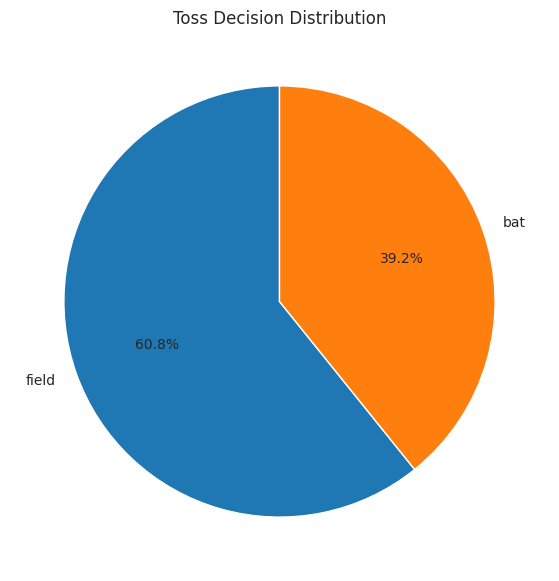

In [64]:
# Visualization 3:
plt.figure(figsize=(9, 7))
plt.pie(toss_decision_counts, labels=toss_decision_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Toss Decision Distribution')
plt.show()

In [65]:
# Question 7 -> How does the toss decision vary across seasons?
toss_decision_season = matches_df.groupby('season')['toss_decision'].value_counts()
toss_decision_season.head(15)

season  toss_decision
2008    field            32
        bat              26
2009    bat              35
        field            22
2010    bat              39
        field            21
2011    field            48
        bat              25
2012    bat              37
        field            37
2013    bat              45
        field            31
2014    field            41
        bat              19
2015    field            34
Name: count, dtype: int64

Text(0.5, 1.0, 'Toss Decision Distribution Across Seasons')

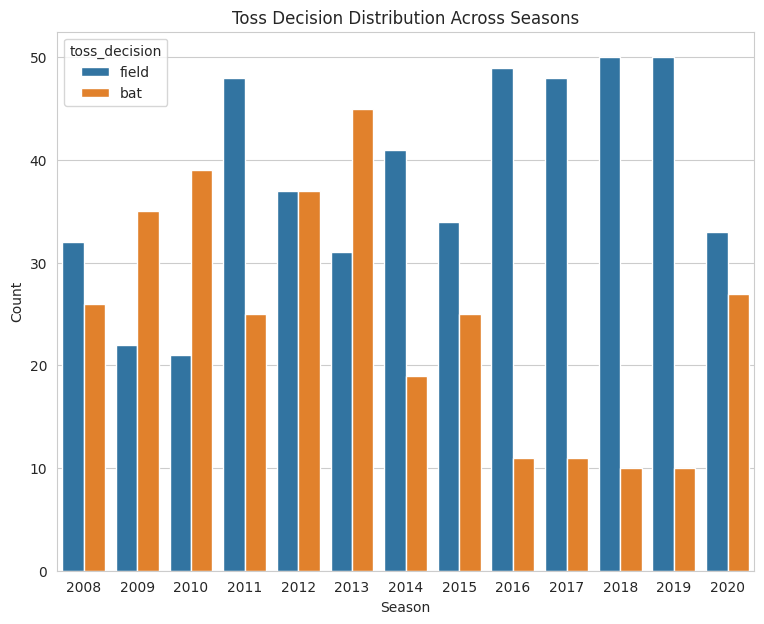

In [66]:
# Visualization 4:
plt.figure(figsize=(9, 7))
sns.countplot(data=matches_df, x='season', hue='toss_decision')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Toss Decision Distribution Across Seasons')

In [67]:
#other way
toss_decision_by_season = matches_df.groupby(['season', 'toss_decision']).count().unstack().fillna(0)
toss_decision_by_season.head(20)

id       city       date       player_of_match       venue  \
toss_decision bat field  bat field  bat field             bat field   bat   
season                                                                      
2008           26    32   26    32   26    32              26    32    26   
2009           35    22   35    22   35    22              35    22    35   
2010           39    21   39    21   39    21              39    21    39   
2011           25    48   25    48   25    48              25    48    25   
2012           37    37   37    37   37    37              37    37    37   
2013           45    31   45    31   45    31              45    31    45   
2014           19    41   19    41   19    41              19    41    19   
2015           25    34   25    34   25    34              25    34    25   
2016           11    49   11    49   11    49              11    49    11   
2017           11    48   11    48   11    48              11    48    11   
2018           10    50   10    50   10    50              10    50    10   
2019           10    50   10    50   10    50              10    50    10   
2020           27    33   27    33   27    33              27    33    27   

                     ... result_margin       eliminator       method        \
toss_decision field  ...           bat field        bat field    bat field   
season               ...                                                     
2008             32  ...            26    32         26    32     26    32   
2009             22  ...            35    22         35    22     35    22   
2010             21  ...            39    21         39    21     39    21   
2011             48  ...            25    48         25    48     25    48   
2012             37  ...            37    37         37    37     37    37   
2013             31  ...            45    31         45    31     45    31   
2014             41  ...            19    41         19    41     19    41   
2015             34  ...            25    34         25    34     25    34   
2016             49  ...            11    49         11    49     11    49   
2017             48  ...            11    48         11    48     11    48   
2018             50  ...            10    50         10    50     10    50   
2019             50  ...            10    50         10    50     10    50   
2020             33  ...            27    33         27    33     27    33   

              umpire1       umpire2        
toss_decision     bat field     bat field  
season                                     
2008               26    32      26    32  
2009               35    22      35    22  
2010               39    21      39    21  
2011               25    48      25    48  
2012               37    37      37    37  
2013               45    31      45    31  
2014               19    41      19    41  
2015               25    34      25    34  
2016               11    49      11    49  
2017               11    48      11    48  
2018               10    50      10    50  
2019               10    50      10    50  
2020               27    33      27    33  

[13 rows x 32 columns]

In [68]:
'''
unstack() is a function used to pivot the data
It is primarily used in dataframes to have multiple index
'''

'\nunstack() is a function used to pivot the data\nIt is primarily used in dataframes to have multiple index\n'

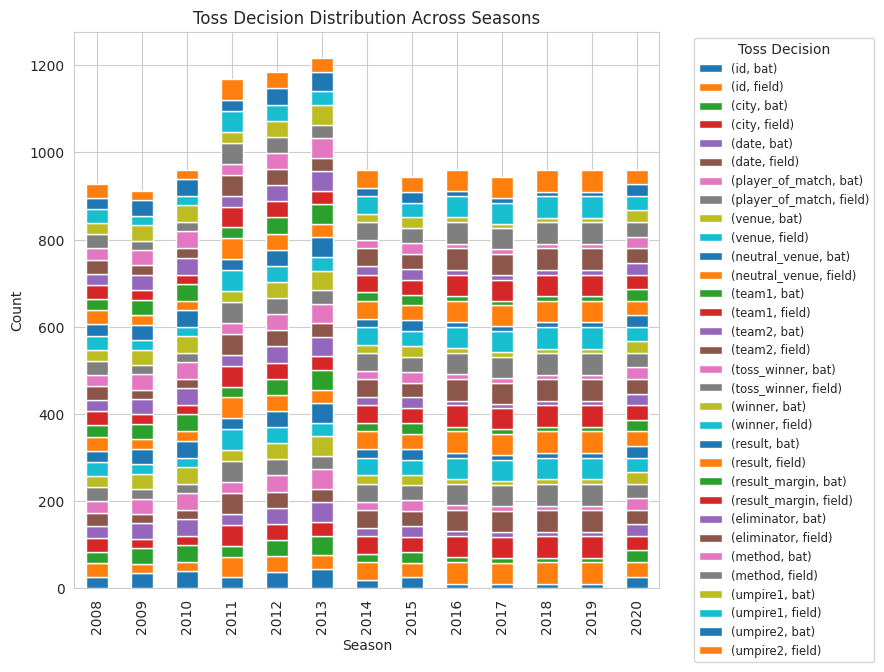

In [69]:
#Visualization:5

toss_decision_by_season.plot(kind='bar', stacked=True, figsize=(9, 7))
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Toss Decision Distribution Across Seasons')
plt.legend(title='Toss Decision', fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [70]:
#Question 8 ->Does winning the toss imply winning the game?
matches_df['toss_win_match_win'] = (matches_df['toss_winner'] == matches_df['winner']).astype(int)
toss_win_match_win_rate = matches_df['toss_win_match_win'].mean()
print(toss_win_match_win_rate)

0.5122549019607843


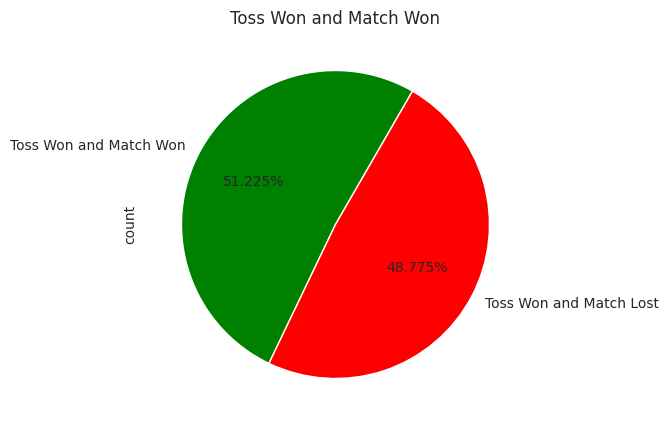

In [71]:
# Visaualization 6 pie chart
plt.figure(figsize=(5, 5))
toss_outcome_counts = matches_df['toss_win_match_win'].value_counts()
toss_outcome_counts.index=['Toss Won and Match Won','Toss Won and Match Lost']
toss_outcome_counts.plot(kind='pie', autopct = '%.3f%%', startangle =60, colors=['g','r'])
plt.title('Toss Won and Match Won')
plt.show()

In [72]:
#Question ->9 How many times has the chasing team won the match?

chasing_team_won = matches_df[matches_df['toss_decision']=='field']
chasing_team_won.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season,toss_win_match_win
0,335982,Bangalore,2008-04-18,BB McCullum,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,no method,Asad Rauf,RE Koertzen,2008,0
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,no method,DJ Harper,GA Pratapkumar,2008,0
8,335990,Hyderabad,2008-04-24,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,N,no method,Asad Rauf,MR Benson,2008,1
9,335991,Chandigarh,2008-04-25,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,no method,Aleem Dar,AM Saheba,2008,0
10,335992,Bangalore,2008-04-26,SR Watson,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,7.0,N,no method,MR Benson,IL Howell,2008,1


In [73]:
chasing_team_won[chasing_team_won['toss_winner']==chasing_team_won['winner']]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season,toss_win_match_win
8,335990,Hyderabad,2008-04-24,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,N,no method,Asad Rauf,MR Benson,2008,1
10,335992,Bangalore,2008-04-26,SR Watson,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,7.0,N,no method,MR Benson,IL Howell,2008,1
12,335994,Mumbai,2008-04-27,AC Gilchrist,Dr DY Patil Sports Academy,0,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,Deccan Chargers,wickets,10.0,N,no method,Asad Rauf,SL Shastri,2008,1
17,335999,Hyderabad,2008-05-01,SE Marsh,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,N,no method,BR Doctrove,RB Tiffin,2008,1
24,336006,Bangalore,2008-05-05,S Sreesanth,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,6.0,N,no method,SJ Davis,BR Doctrove,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,1216527,Sharjah,2020-09-27,SV Samson,Sharjah Cricket Stadium,0,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,N,no method,RK Illingworth,K Srinivasan,2020,1
799,1216535,Dubai,2020-10-31,Ishan Kishan,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,9.0,N,no method,YC Barde,PR Reiffel,2020,1
800,1216536,Dubai,2020-10-29,RD Gaikwad,Dubai International Cricket Stadium,0,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,6.0,N,no method,C Shamshuddin,RK Illingworth,2020,1
801,1216537,Abu Dhabi,2020-10-30,BA Stokes,Sheikh Zayed Stadium,0,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,7.0,N,no method,CB Gaffaney,S Ravi,2020,1


In [74]:
chasing_team_won[chasing_team_won['toss_winner']==chasing_team_won['winner']].shape[0]

273

In [75]:
# Another way
chasing_team_wins = matches_df[(matches_df['toss_decision'] == 'field') & (matches_df['toss_winner'] == matches_df['winner'])].shape[0]
print(f"The chasing team has won the match {chasing_team_wins} times.")

The chasing team has won the match 273 times.


In [76]:
#Question -> 10 Which all teams had won this tournament?

final_matches = matches_df.drop_duplicates(subset=['season'], keep='last')
tournament_winners = final_matches['winner'].value_counts()
print("Teams that have won the tournament:")
print(tournament_winners)

Teams that have won the tournament:
winner
Mumbai Indians           5
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: count, dtype: int64


In [77]:
# Question 11 -> Which team has played the most number of matches?
matches_played = pd.concat([matches_df['team1'], matches_df['team2']]).value_counts()
matches_played.head(5)

,count
Mumbai Indians,203
Royal Challengers Bangalore,195
Delhi Capitals,194
Kolkata Knight Riders,192
Kings XI Punjab,190


In [78]:
#Question 12 -> Which team has won the most number of times?
most_wins =matches_df['winner'].value_counts()
most_wins.head(1)

,count
winner,
Mumbai Indians,120


In [79]:
#Question 13 -> Which team has the highest winning percentage?

total_matches_team = matches_df['team1'].value_counts().sort_index() + matches_df['team2'].value_counts().sort_index()
wins_team = matches_df['winner'].value_counts().sort_index()
winning_percentage = (wins_team / total_matches_team) * 100
highest_winning_percentage_team = winning_percentage.idxmax()
print(f"The team with the highest winning percentage is: {highest_winning_percentage_team}")

The team with the highest winning percentage is: Chennai Super Kings


In [80]:
winning_percentage.head()

,count
Chennai Super Kings,59.550562
Deccan Chargers,38.666667
Delhi Capitals,44.329897
Gujarat Lions,43.333333
Kings XI Punjab,46.315789


In [81]:
#Question 14 ->Is there any lucky venue for a particular team?
lucky_venue = matches_df.groupby(['venue', 'winner']).size().reset_index(name='win_count')
lucky_venue =lucky_venue.sort_values('win_count',ascending =False)
lucky_venues_per_team = lucky_venue.groupby('winner').first().sort_values(by= 'win_count',ascending=False)
lucky_venues_per_team.head()

,venue,win_count
winner,,
Kolkata Knight Riders,Eden Gardens,45
Mumbai Indians,Wankhede Stadium,42
Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",40
Royal Challengers Bangalore,M.Chinnaswamy Stadium,37
Rajasthan Royals,Sawai Mansingh Stadium,32


In [82]:
# Question 15 -> Innings wise comparison between teams
innings_comparison = balls_df.groupby(['batting_team','inning'])['total_runs'].sum().unstack()
innings_comparison

inning,1,2
batting_team,,
Chennai Super Kings,15344,13019
Deccan Chargers,6765,4698
Delhi Capitals,14107,15474
Gujarat Lions,2267,2589
Kings XI Punjab,15710,14307
Kochi Tuskers Kerala,1009,892
Kolkata Knight Riders,14842,14541
Mumbai Indians,18338,13948
Pune Warriors,2973,3385


In [83]:
# Question 16 -> Which team has scored the most number of 200+ scores?
team_total_runs= balls_df.groupby(['id','batting_team'])['total_runs'].sum().reset_index()
team_total_runs = team_total_runs[team_total_runs['total_runs']>=200]
team_total_runs['batting_team'].value_counts().head(1)

,count
batting_team,
Royal Challengers Bangalore,19


In [84]:
# Question 17 -> Which team has conceded 200+ scores the most?
team_200plus_against = balls_df.groupby(['id', 'bowling_team'])['total_runs'].sum().reset_index()
team_200plus_against = team_200plus_against[team_200plus_against['total_runs'] >= 200]
team_200plus_against['bowling_team'].value_counts().head(1)

,count
bowling_team,
Kings XI Punjab,20


In [85]:
#Question 18 -> What was the highest run scored by a team in a single match?

runs_match=balls_df.groupby(['id','batting_team'])['total_runs'].sum().reset_index().sort_values(by='total_runs',ascending=False)

In [86]:
runs_match[runs_match['total_runs']==runs_match['total_runs'].max()]

,id,batting_team,total_runs
702,598027,Royal Challengers Bangalore,263


In [87]:
#Question 19 -> Which is the biggest win in terms of run margin?

matches_df['result_margin'] = pd.to_numeric(matches_df['result_margin'], errors='coerce')
matches_df[['winner','team1','team2','result_margin']][matches_df['result_margin']==matches_df['result_margin'].max()]


,winner,team1,team2,result_margin
620,Mumbai Indians,Delhi Capitals,Mumbai Indians,146.0


In [88]:
#Question 20 -> Which batsmen have played the most number of balls?

balls_played= balls_df.groupby('batsman')['ball'].count().sort_values(ascending=False)
balls_played.head()

,ball
batsman,
V Kohli,4609
S Dhawan,4208
RG Sharma,4088
SK Raina,4041
DA Warner,3819


In [89]:
# another way
balls_df.groupby('batsman').size().sort_values(ascending=False).head(1)

,0
batsman,
V Kohli,4609


In [90]:
#Question 21 -> Who is the leading run scorers of all the time?
run_scorers = balls_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)
run_scorers.head(10)

,batsman_runs
batsman,
V Kohli,5878
SK Raina,5368
DA Warner,5254
RG Sharma,5230
S Dhawan,5197
AB de Villiers,4849
CH Gayle,4772
MS Dhoni,4632
RV Uthappa,4607


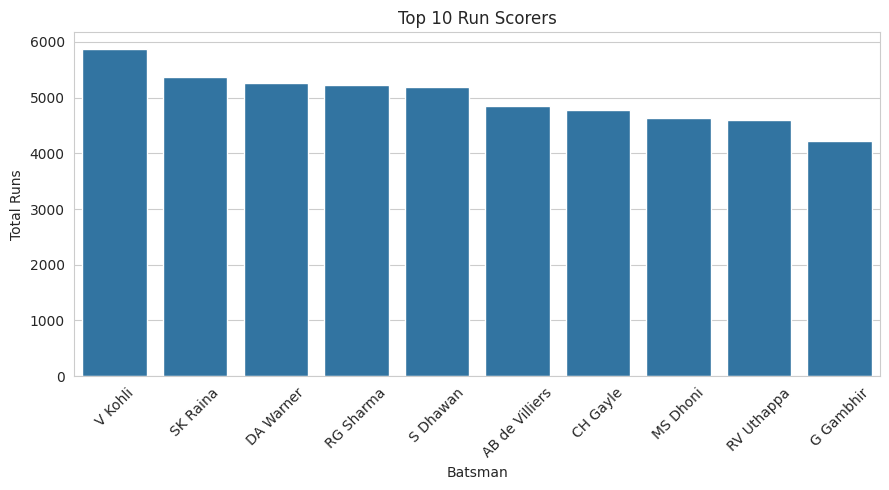

In [91]:
#Visualization 7
plt.figure(figsize=(9, 5))
sns.barplot(x=run_scorers.head(10).index, y=run_scorers.head(10).values)
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.title('Top 10 Run Scorers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [92]:
matches_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season,toss_win_match_win
0,335982,Bangalore,2008-04-18,BB McCullum,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,no method,Asad Rauf,RE Koertzen,2008,0
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,no method,MR Benson,SL Shastri,2008,1
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,no method,Aleem Dar,GA Pratapkumar,2008,0
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,no method,SJ Davis,DJ Harper,2008,0
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,no method,BF Bowden,K Hariharan,2008,0


In [93]:
balls_df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,no dismissal kind,no player dismissed,no fielder,no extras type,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,no dismissal kind,no player dismissed,no fielder,no extras type,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,no dismissal kind,no player dismissed,no fielder,no extras type,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,no dismissal kind,no player dismissed,no fielder,no extras type,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,no dismissal kind,no player dismissed,no fielder,no extras type,Kolkata Knight Riders,Royal Challengers Bangalore


In [94]:
# Question 22 -> Who has hit the most number of 4's?

fours = balls_df[((balls_df['batsman_runs'] == 4) | (balls_df['batsman_runs'] == 5)) & balls_df['non_boundary'] >= 0]['batsman'].value_counts()
fours.head(1).index

Index(['V Kohli'], dtype='object', name='batsman')

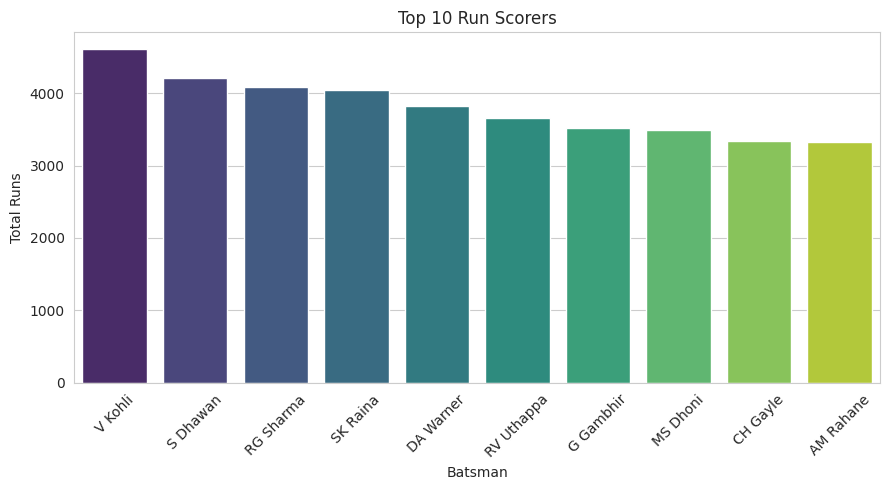

In [95]:
#Visualization 8
plt.figure(figsize=(9, 5))
sns.barplot(x=fours.head(10).index, y=fours.head(10).values, palette='viridis')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.title('Top 10 Run Scorers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [96]:
# Question 22 -> Who has hit the most number of 6's?

sixs = balls_df[(balls_df['batsman_runs'] == 6) & balls_df['non_boundary'] == 0]['batsman'].value_counts()
sixs.head(1).index

Index(['V Kohli'], dtype='object', name='batsman')

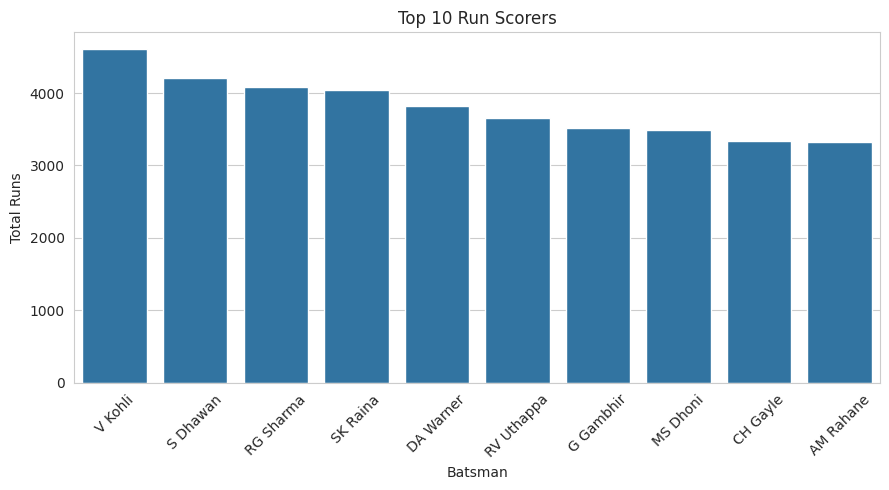

In [97]:
#Visualization 9
plt.figure(figsize=(9, 5))
sns.barplot(x=sixs.head(10).index, y=sixs.head(10).values)
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.title('Top 10 Run Scorers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [98]:
# Question -> 24 Who has the higghest strike rate?

balls = balls_df[balls_df['extra_runs'] == 0]
balls_faced = balls_df.groupby('batsman').size()
total_runs = balls_df.groupby('batsman')['batsman_runs'].sum().sort_index()
strike_rate = (total_runs / balls_faced) * 100
strike_rate.sort_values(ascending=False).head(10)


,0
batsman,
B Stanlake,250.000000
Umar Gul,205.263158
RS Sodhi,200.000000
Shahid Afridi,176.086957
I Malhotra,175.000000
TU Deshpande,175.000000
AD Russell,171.995465
LJ Wright,168.253968
Abdul Samad,168.181818


In [99]:
#Question 25 -> Who is the leading wicket-taker?

wicket_taker= balls_df[(balls_df['is_wicket'] == 1) & (balls_df['dismissal_kind'] !='run out')]
wicket_taker['bowler'].value_counts().idxmax()

'SL Malinga'

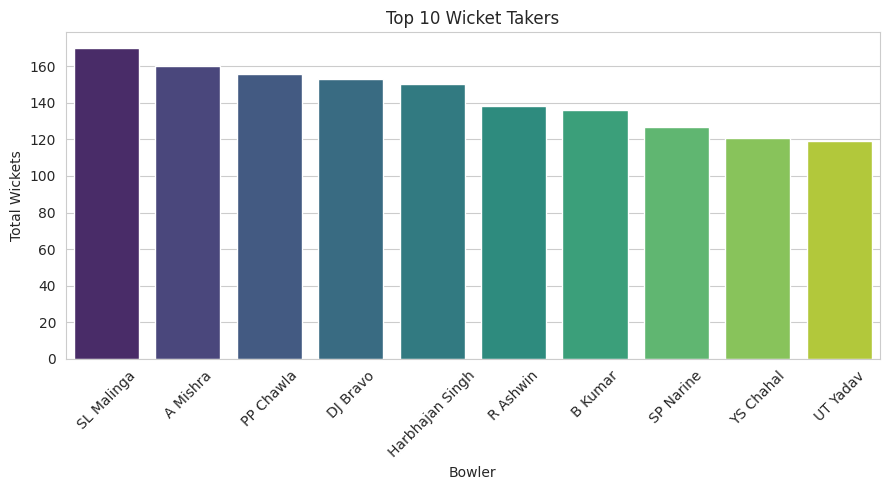

In [100]:
#Visualization 10
plt.figure(figsize=(9, 5))
sns.barplot(x=wicket_taker['bowler'].value_counts().head(10).index, y=wicket_taker['bowler'].value_counts().head(10).values, palette='viridis')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.title('Top 10 Wicket Takers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [101]:
# Question 26 -> Which Stadium hosted the most number of matches?
stadium_matches = matches_df['venue'].value_counts()
stadium_matches.head(1)

,count
venue,
M.Chinnaswamy Stadium,80


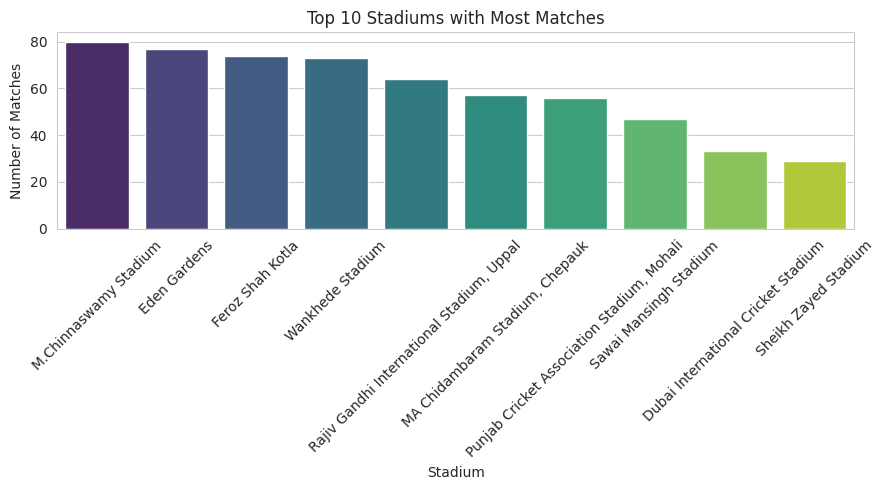

In [102]:
#Visualization 11
#Plot for top 10 stadiums
plt.figure(figsize=(9, 5))
sns.barplot(x=stadium_matches.head(10).index, y=stadium_matches.head(10).values, palette='viridis')
plt.xlabel('Stadium')
plt.ylabel('Number of Matches')
plt.title('Top 10 Stadiums with Most Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [103]:
# Question 26 -> Who has the most man of the man awards?
man_of_the_match = matches_df['player_of_match'].value_counts()
man_of_the_match.head(1)

,count
player_of_match,
AB de Villiers,23


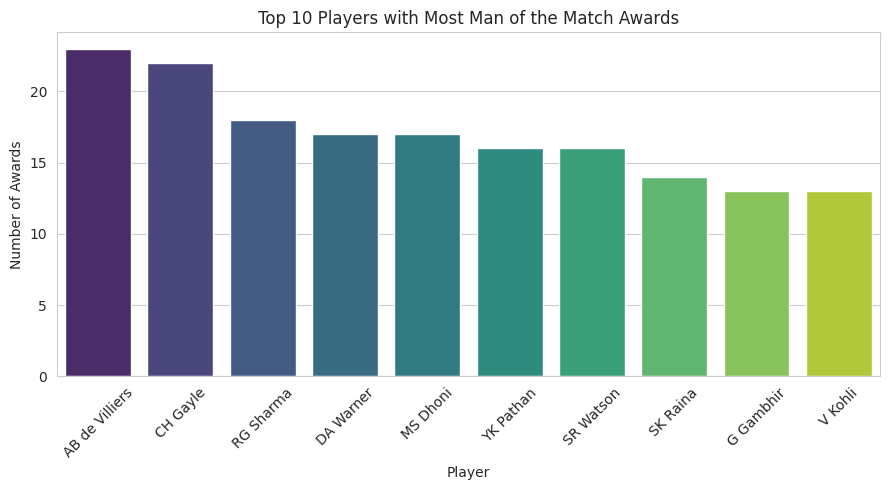

In [104]:
#Visualization 12
# Plot for top 10 MOM award winners
plt.figure(figsize=(9, 5))
sns.barplot(x=man_of_the_match.head(10).index, y=man_of_the_match.head(10).values, palette='viridis')
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.title('Top 10 Players with Most Man of the Match Awards')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [105]:
# Question 28-> What is the count of fours hit in each season?

balls_with_season =balls_df.merge(matches_df[['id','season']],on = 'id')
fours= balls_with_season[balls_with_season['batsman_runs']==4].groupby('season')['batsman_runs'].count()
fours


,batsman_runs
season,
2008,1703
2009,1317
2010,1708
2011,1916
2012,1911
2013,2052
2014,1562
2015,1607
2016,1633


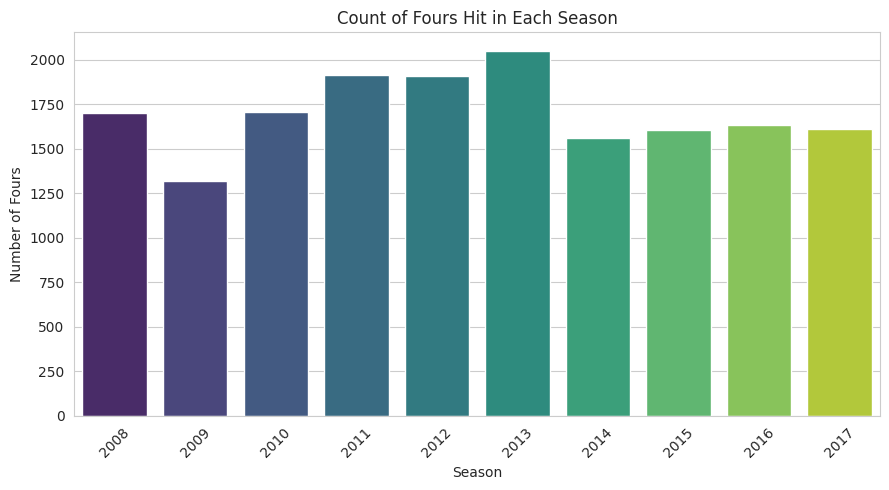

In [106]:
#Visualization 13
plt.figure(figsize=(9, 5))
sns.barplot(x=fours.head(10).index, y=fours.head(10).values, palette='viridis')
plt.xlabel('Season')
plt.ylabel('Number of Fours')
plt.title('Count of Fours Hit in Each Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [107]:
# Question 29-> What is the count of sixs hit in each season?

balls_with_season =balls_df.merge(matches_df[['id','season']],on = 'id')
sixs= balls_with_season[balls_with_season['batsman_runs']==6].groupby('season')['batsman_runs'].count()
sixs

,batsman_runs
season,
2008,623
2009,506
2010,585
2011,639
2012,733
2013,675
2014,714
2015,692
2016,639


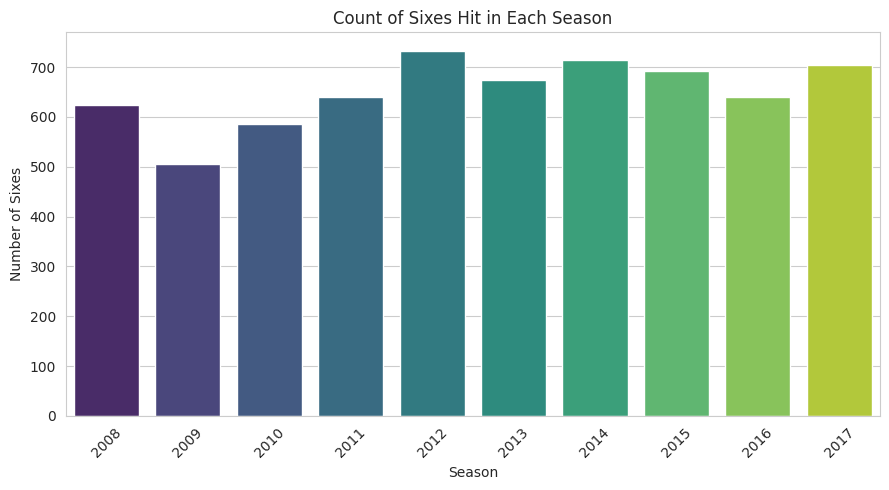

In [108]:
#Visualiztion 14
plt.figure(figsize=(9, 5))
sns.barplot(x=sixs.head(10).index, y=sixs.head(10).values, palette='viridis')
plt.xlabel('Season')
plt.ylabel('Number of Sixes')
plt.title('Count of Sixes Hit in Each Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [109]:
# Question 30 -> What is the count of runs scored from boundaries in each season?

runs_boundaries = balls_with_season[(balls_with_season['batsman_runs'] == 4) | (balls_with_season['batsman_runs'] == 6)].groupby('season')['batsman_runs'].sum()
runs_boundaries

,batsman_runs
season,
2008,10550
2009,8304
2010,10342
2011,11498
2012,12042
2013,12258
2014,10532
2015,10580
2016,10366


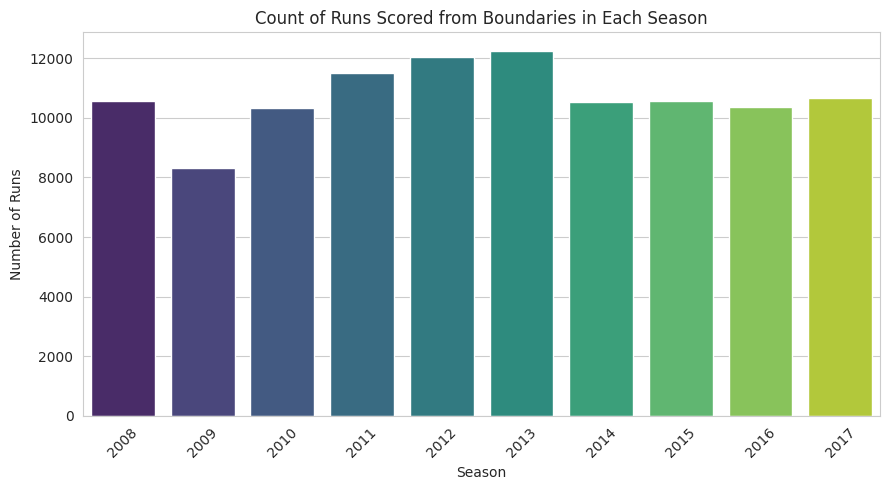

In [110]:
#Visualization 16
plt.figure(figsize=(9, 5))
sns.barplot(x=runs_boundaries.head(10).index, y=runs_boundaries.head(10).values, palette='viridis')
plt.xlabel('Season')
plt.ylabel('Number of Runs')
plt.title('Count of Runs Scored from Boundaries in Each Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [111]:
# Question 31 -> What is the run contribution from boundaries in each season?
total_runs= balls_with_season.groupby('season')['batsman_runs'].sum()
run_contribution = (runs_boundaries / total_runs) * 100
run_contribution


,batsman_runs
season,
2008,62.763995
2009,54.118874
2010,58.314068
2011,57.697712
2012,56.474230
2013,57.208195
2014,58.765763
2015,60.773163
2016,57.710723


In [112]:
# Question 32 -> Which team has scored the most runs in the first 6 overs?

powerplay_runs = balls_df[balls_df['over'] <= 6].groupby('batting_team')['total_runs'].sum()
powerplay_runs.idxmax()


'Mumbai Indians'

In [113]:
#Question 33 -> Which team has scored the most runs in last 4 overs?

last_4_overs_runs = balls_df[balls_df['over'] >= 16].groupby('batting_team')['total_runs'].sum()
last_4_overs_runs.idxmax()

'Mumbai Indians'

In [114]:
# Question 34 -> Which team has the best scoring run-rate in the first 6 overs?
powerplay_run_rate = balls_df[balls_df['over'] <= 6].groupby('batting_team')['total_runs'].sum() / 6
powerplay_run_rate.idxmax()

'Mumbai Indians'

In [115]:
# Question 35 -> Which team has the best scoring run-rate in  the last 4 overs?
last_4_overs_run_rate = balls_df[balls_df['over'] >= 16].groupby('batting_team')['total_runs'].sum() / 4
last_4_overs_run_rate.idxmax()

'Mumbai Indians'

#**Conclusions:**

* Matches per Season: The number of matches played per season has varied, with some seasons having significantly more matches (e.g., 2011, 2012, 2013) than others, likely due to changes in the tournament format.
* Runs per Season: The total runs scored per season generally correlate with the number of matches played, with higher run totals in seasons with more matches.
* Toss Decisions: Teams winning the toss have historically preferred to field first, although there have been seasons where batting first was more common. The analysis shows that winning the toss has a slight advantage in winning the match (around 51.2%).
* Chasing Success: The analysis indicates that the chasing team has won a significant number of matches, reinforcing the observation that teams often prefer to field first after winning the toss.
* Tournament Winners: Mumbai Indians have been the most successful team in terms of winning the tournament titles, followed by Chennai Super Kings.
* Team Performance: Mumbai Indians have played and won the most matches overall. Chennai Super Kings have the highest winning percentage among all teams.
* Lucky Venues: Some venues appear to be "lucky" for certain teams, with teams like Kolkata Knight Riders having a high win count at Eden Gardens and Mumbai Indians at Wankhede Stadium.
* Innings Comparison: There isn't a consistent pattern across all teams regarding higher scores in the first or second innings; it varies by team.
* High Scores: Royal Challengers Bangalore has scored 200+ runs the most times, while Kings XI Punjab has conceded 200+ runs the most times. The highest team total recorded in the dataset is 263 by Royal Challengers Bangalore.
* Biggest Win Margin: The largest victory in terms of runs was by Mumbai Indians with a margin of 146 runs.
* Leading Batsmen: V Kohli has faced the most balls and is the leading run-scorer. V Kohli has also hit the most fours and sixes.
* Highest Strike Rate: While V Kohli has scored the most runs, players like B Stanlake and Umar Gul have recorded the highest strike rates (among players who have faced a reasonable number of balls).
* Leading Bowlers: SL Malinga is the leading wicket-taker in the dataset.
* Most Hosted Stadium: M.Chinnaswamy Stadium has hosted the most number of matches.
* Man of the Match Awards: AB de Villiers has received the most Man of the Match awards.
* Boundaries per Season: The number of fours and sixes hit per season has fluctuated but generally shows a healthy contribution to the total runs scored in each season. The run contribution from boundaries has consistently been over 50%.
* Powerplay and Death Overs: Mumbai Indians have scored the most runs in both the first 6 overs (powerplay) and the last 4 overs.

**Through visualizations and analysis, we gained a deeper understanding of the IPL's dynamics, identified significant trends in team and player performance, and explored the influence of factors like toss decisions and venues**